In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

from utils.orb_paths import SetupPaths
import utils.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils.merger_trees import TraceMergerTree
from utils.readMergerHistoryFiles import FindHistory
from utils.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()


imported h5py...
modules seem to have loaded?


## open the pairs catalog

In [2]:
f = h5py.File(f"../data/lowmass_z1p5.hdf5", 'r')
pairs = {}
print(f['Header'].attrs.keys())
for key, val in f.items():
    if key == "Header":
        continue
    pairs[key]=np.array(val)
    
f.close()
    

<KeysViewHDF5 ['Details', 'Redshift', 'Simulation', 'Snapshot']>


In [3]:
pair1 = pairs['Sub1 ID'][0]
pair2 = pairs['Sub2 ID'][0]
mass1 = pairs['Sub1 Mass'][0]
mass2 = pairs['Sub2 Mass'][0]

In [4]:
print(pair1, mass1, pair2, mass2)

222536 35.549774260023966 222537 27.455131951988992


## open the group catalog to pull out all of the subhalos in the group

In [1]:
catpath = paths.path_tnghydro
snap = 40
keysel_default =  [
            'GroupPos','Group_M_TopHat200', 
            'Group_R_TopHat200','GroupNsubs',
            'GroupFirstSub',
            'SubhaloGrNr','SubhaloMass',
            'SubhaloPos','SubhaloVel']
little_h = 0.6774

catalog = readSub.subfind_catalog(
            basedir=catpath,
            snapnum=snap,keysel=keysel_default)

NameError: name 'paths' is not defined

In [6]:
group = catalog.SubhaloGrNr[pair1]
print(group)
print(catalog.GroupFirstSub[group])
print(catalog.Group_M_TopHat200[group])
print(catalog.GroupNsubs[group])

1486
222536
27.195512771606445
74


In [7]:
print(catalog.SubhaloMass[pair1]/little_h)
print(catalog.SubhaloMass[pair2]/little_h)

35.549774260023966
27.455131951988992


In [8]:
group_subids = np.where(catalog.SubhaloGrNr == group)[0]

## Look at the merger trees of each of the subhalos

In [9]:
treedict = {}
for sub in group_subids:
    treedict[sub] = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=sub)

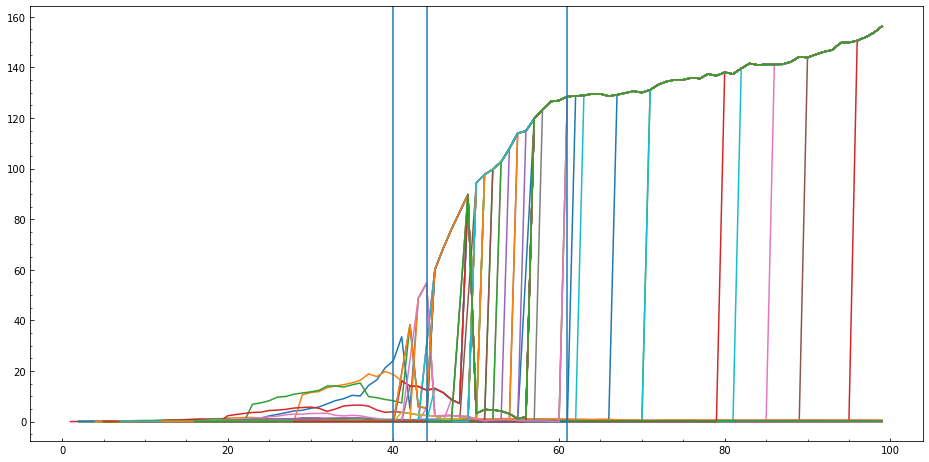

In [10]:
fig = plt.figure(figsize=(16,8))
for sub in group_subids:
    plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['SubhaloMass'],label=sub)
#     plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'r',label='halo2')
plt.axvline(40)
plt.axvline(44)
plt.axvline(treedict[group_subids[0]].mergedbranch['SnapNum'][38])

# plt.legend()
plt.show()

**five most massive at z = 1.5**


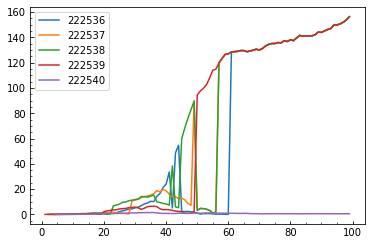

In [11]:
fig = plt.figure()
for sub in group_subids[0:5]:
    plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['SubhaloMass'],label=sub)

plt.legend()
plt.show()

## when is the most massive subhalo at z=1.5 the most massive at other snaps?

In [27]:
first = group_subids[0] 
first

222536

In [13]:
treedict[first].mergedbranch['SubfindID'] == treedict[first].mergedbranch['GroupFirstSub']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [14]:
idz0 = treedict[first].mergedbranch['GroupFirstSub'][0] # the id of the group's largest subhalo at z=0
idz0

405882

## look at merger tree of that halo 

In [19]:
zerotree = TraceMergerTree(snapshot=99,physics="hydro",sim="TNG",subfindID=idz0)

In [26]:
zerotree.pastbranch.SubfindID[59]

222539

In [ ]:
222539